## 大气中存在低频变化，它的水平结构表现为遥相关型，大气遥相关指数可以定量来表征遥相关型。本实习主要以大气遥相关指数的计算来表征大气遥相关，并分析遥相关型的空间分布特征以及大气遥相关与我国气候异常的关系。

### ◼ 选择EU指数，输出1月该指数年际变化的时间序列；

### ◼ 计算EU指数与同期环流场（500hPa高度场）的相关系数；

### ◼ 计算EU指数与同期我国气温的相关系数。

### ◼ 计算EU指数与后期我国降水的相关系数。

In [1]:
import xarray as xr
prec=xr.open_dataset(r"D:\data\short_term_climate_class\sx04\precip.mon.mean.nc",drop_variables=["time_bnds",'lat_bnds','lon_bnds'])
prec

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 519)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/02 through latest.

In [2]:
tem=xr.open_dataset(r"D:\data\short_term_climate_class\sx03\air.2m.mon.mean.nc",drop_variables=["time_bnds"])
tem

<xarray.Dataset>
Dimensions:  (level: 1, lat: 94, lon: 192, time: 519)
Coordinates:
  * level    (level) float32 2.0
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    air      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

In [3]:
z=xr.open_dataset(r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc", drop_variables=["time_bnds"])
z

<xarray.Dataset>
Dimensions:  (level: 17, lat: 73, lon: 144, time: 519)
Coordinates:
  * level    (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-03-01
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    title:          Monthly NCEP/DOE Reanalysis 2
    comments:       Data is from \nNCEP/DOE AMIP-II Reanalysis (Reanalysis-2)...
    platform:       Model
    source:         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Model
    institution:    National Centers for Environmental Prediction
    dataset_title:  NCEP-DOE AMIP-II Reanalysis
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.reanalysi...
    source_url:     http://www.cpc.ncep.noaa.gov/products/wesley/reanalysis2/
    history:        created 2002/03 by Hoop (netCDF2.3)\nConverted to chunked...

## 提取数据

In [4]:
#500hPa
z_500= z.hgt.loc[z.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01', 500,90:0,0:360]
z_500

<xarray.DataArray 'hgt' (time: 42, lat: 37, lon: 144)>
[223776 values with dtype=float32]
Coordinates:
    level    float32 500.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... 10.0 7.5 5.0 2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

In [5]:
#同期中国气温
air= tem.air.loc[tem.time.dt.month.isin([1])].loc['1979-01-01':'2020-02-01', 2.0,55:15,70:140]
air

<xarray.DataArray 'air' (time: 42, lat: 21, lon: 37)>
array([[[253.89   , 253.65   , ..., 244.34   , 246.25   ],
        [254.79   , 254.81999, ..., 245.59   , 247.48   ],
        ...,
        [298.31   , 298.59998, ..., 298.72998, 298.97   ],
        [299.14   , 299.08002, ..., 299.57   , 299.74   ]],

       [[254.15   , 254.25   , ..., 247.33   , 248.67   ],
        [253.52   , 253.76   , ..., 246.52   , 248.04   ],
        ...,
        [298.41   , 297.87   , ..., 298.31   , 298.36   ],
        [299.55   , 299.08002, ..., 299.19   , 299.18   ]],

       ...,

       [[260.26   , 259.97   , ..., 254.81999, 256.12   ],
        [258.22998, 257.82   , ..., 254.64   , 255.64   ],
        ...,
        [298.22   , 296.81   , ..., 298.52002, 298.59998],
        [299.58002, 298.87   , ..., 299.33002, 299.34   ]],

       [[264.44   , 264.49   , ..., 256.19   , 255.89   ],
        [263.83002, 263.8    , ..., 256.83002, 257.13   ],
        ...,
        [298.01   , 297.59998, ..., 299.57   , 299.57   ],
        [299.43   , 298.84998, ..., 300.06   , 299.99   ]]], dtype=float32)
Coordinates:
    level    float32 2.0
  * lat      (lat) float32 54.28 52.38 50.48 48.57 ... 21.9 20.0 18.09 16.19
  * lon      (lon) float32 71.25 73.12 75.0 76.88 ... 133.1 135.0 136.9 138.8
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Mean of Forecast of Air temperature at 2 m
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     2 m
    statistic:      Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (interval: 6 hours to daily) time: mean (inter...
    valid_range:    [120. 430.]
    actual_range:   [197.63 313.76]

In [6]:
#同期中国降水
pre= prec.precip.loc[prec.time.dt.month.isin([7])].loc['1979-01-01':'2020-12-01',15:55,70:140]
pre

<xarray.DataArray 'precip' (time: 42, lat: 16, lon: 28)>
array([[[ 2.868011, 17.335438, ...,  4.702395,  3.955619],
        [ 3.553171, 14.072554, ...,  5.621114,  5.012529],
        ...,
        [ 2.807251,  3.640739, ...,  2.677831,  2.732004],
        [ 2.536463,  3.590004, ...,  3.922226,  3.253308]],

       [[ 2.071974, 19.773106, ...,  1.00764 ,  0.947607],
        [ 2.46434 , 15.550539, ...,  0.529836,  0.118654],
        ...,
        [ 1.8425  ,  2.206614, ...,  0.75906 ,  0.400164],
        [ 1.795395,  2.644279, ...,  0.875983,  0.250596]],

       ...,

       [[ 7.906891, 23.73453 , ...,  6.05415 ,  5.06271 ],
        [ 7.846079, 19.942387, ...,  6.517724,  5.939366],
        ...,
        [ 0.697674,  1.032993, ...,  3.536477,  2.874253],
        [ 1.584367,  1.313555, ...,  3.809547,  2.127781]],

       [[12.119921, 22.323439, ...,  2.770818,  1.961558],
        [ 9.367441, 13.830311, ...,  2.635198,  1.949424],
        ...,
        [ 2.009389,  3.593916, ...,  3.67535 ,  3.293535],
        [ 1.203043,  1.058541, ...,  2.885617,  2.065015]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 16.25 18.75 21.25 23.75 ... 46.25 48.75 51.25 53.75
  * lon      (lon) float32 71.25 73.75 76.25 78.75 ... 131.2 133.8 136.2 138.8
  * time     (time) datetime64[ns] 1979-07-01 1980-07-01 ... 2020-07-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [0.0000000e+00 4.1256334e+30]

## 标准化去趋势

In [7]:
from scipy.signal import detrend
def det(data,lon,lat,time):
    det_data=detrend(data,axis=0,type='linear')
    
    new_data=xr.DataArray(det_data,
                        dims=["time", "lat", "lon"],
                        coords={'time':time,
                                'lat':lat,
                                'lon':lon }
                          )
    return new_data

## 求相关系数函数 

In [8]:
from scipy.stats import pearsonr
def cor(x,y,data_1,data_2 ):
        r=np.zeros(shape=(y,x))
        p=np.zeros(shape=(y,x))
        test_r=np.zeros(shape=(y,x))
        for i in range(y):
              for j in range(x):
                    r[i,j],p[i,j]=pearsonr(data_1,data_2[:,i,j])
                    if abs(p[i,j])>0.05:
                            test_r[i,j]=np.NaN
                    else:
                            test_r[i,j]=r[i,j]
        
        return r,p,test_r

## 计算

In [10]:
new_z=det(z_500,z_500.lon,z_500.lat,z_500.time)
new_air=det(air,air.lon,air.lat,air.time)
new_pre=det(pre,pre.lon,pre.lat,pre.time)
#EU指数
EU=-new_z.loc[:,55,20]/4.+new_z.loc[:,55,75]/2.-new_z.loc[:,40,145]/4.
#标准化
EU_nor=(EU-EU.mean(axis=0))/(EU.std(axis=0))
EU_nor
#计算相关系数
r_z,p_z,test_r_z=cor(144,37,EU_nor,new_z)
r_air,p_air,test_r_air=cor(37,21,EU_nor,new_air)
r_pre,p_pre,test_r_pre=cor(28,16,EU_nor,new_pre)

In [16]:
z_500.loc[:,55,20]

<xarray.DataArray 'hgt' (time: 42)>
array([5336., 5373., 5330., 5381., 5376., 5308., 5273., 5269., 5311., 5436.,
       5547., 5449., 5470., 5511., 5403., 5332., 5362., 5521., 5499., 5414.,
       5401., 5380., 5433., 5463., 5357., 5280., 5356., 5540., 5329., 5441.,
       5394., 5375., 5393., 5343., 5360., 5408., 5361., 5340., 5445., 5396.,
       5307., 5515.], dtype=float32)
Coordinates:
    level    float32 500.0
    lat      float32 55.0
    lon      float32 20.0
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
Attributes:
    long_name:      Monthly Geopotential Heights on Pressure Levels
    units:          m
    precision:      0
    GRIB_id:        7
    GRIB_name:      HGT
    var_desc:       Geopotential height
    dataset:        NCEP/DOE AMIP-II Reanalysis (Reanalysis-2) Monthly Averages
    level_desc:     Pressure Levels
    statistic:      Individual Obs
    parent_stat:    Other
    standard_name:  geopotential_height
    cell_methods:   time: mean (montly from 6-hourly values)
    valid_range:    [-1500. 35800.]
    actual_range:   [ -347. 32301.]

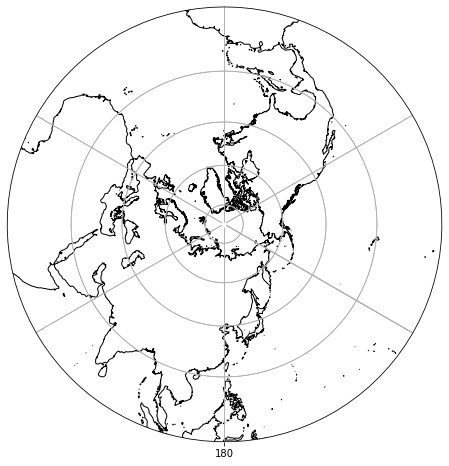

In [77]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig = plt.figure(figsize=[12, 8])
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(central_longitude = 120))
ax1.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())
gl1 = ax1.gridlines(draw_labels=True,x_inline=False, y_inline=False) #添加网格线
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
# 生成一个圆形的Path
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# 将该Path设置为GeoAxes的边界
ax1.set_boundary(circle, transform=ax1.transAxes)
ax1.gridlines(draw_labels=True)
#ax1.set_boundary(circle, transform=ax1.transAxes)

ax1.set_xticks([180])
ax1.set_boundary(circle, transform=ax1.transAxes)

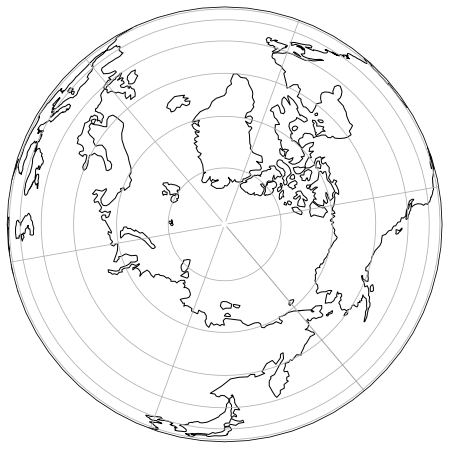

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.NearsidePerspective(
                        central_latitude=90,
                        central_longitude=140,
                        satellite_height=10000000.0))
ax.coastlines(resolution='110m')
ax.gridlines()
plt.show()

In [23]:
def bar_map(fig_ax,size,data_pc,start_year,end_year):
    c_color=[]
    for i in range(start_year,end_year+1):
        if data_pc[i-start_year] >0:
              c_color.append('red')
        elif data_pc[i-start_year]<=0:
              c_color.append('blue')
    fig_ax.set_ylim(-3.1,3.1)
    fig_ax.axhline(0,linestyle="--")
    plt.xticks(size=size)
    plt.yticks(size = size)
    fig_ax.bar(range(start_year,end_year+1),data_pc,color=c_color)

In [24]:
#底图
def c_map(ax,img_extent,spec,a):           
        proj=ccrs.PlateCarree()
        ax.set_extent(img_extent,crs = proj)
        if a==1:
            ax.set_xticks(np.arange(img_extent[0], img_extent[1] + spec, spec), crs = proj)
            ax.set_yticks(np.arange(img_extent[2], img_extent[3] + spec, spec),crs = proj)
            lon_formatter = cticker.LongitudeFormatter()
            lat_formatter = cticker.LatitudeFormatter()
            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
            plt.xticks(fontsize=14)  # 设置标签大小
            plt.yticks(fontsize=14)
        else:
            
            pass

        #ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
        #ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
        ax.add_feature(cfeature.LAKES.with_scale('50m'))#湖泊
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
                           
        #ax.add_geometries(Reader(r'D:\data\china_map\river1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='b',linewidth=0.2)#长江黄河
        #ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#详细国界中国国界
        #ax.add_geometries(Reader(r'D:\data\china_map\china2.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.1)#省界
        #ax.add_geometries(Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#海岸线
        #ax.add_geometries(Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#湖泊
        #ax.add_geometries(Reader(r"D:\data\china_map\china0").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.2)#简单国界
        #ax.add_geometries(Reader(r"D:\data\china_map\country1.shp").geometries(),ccrs.PlateCarree(),facecolor='none',edgecolor='k',linewidth=0.1)


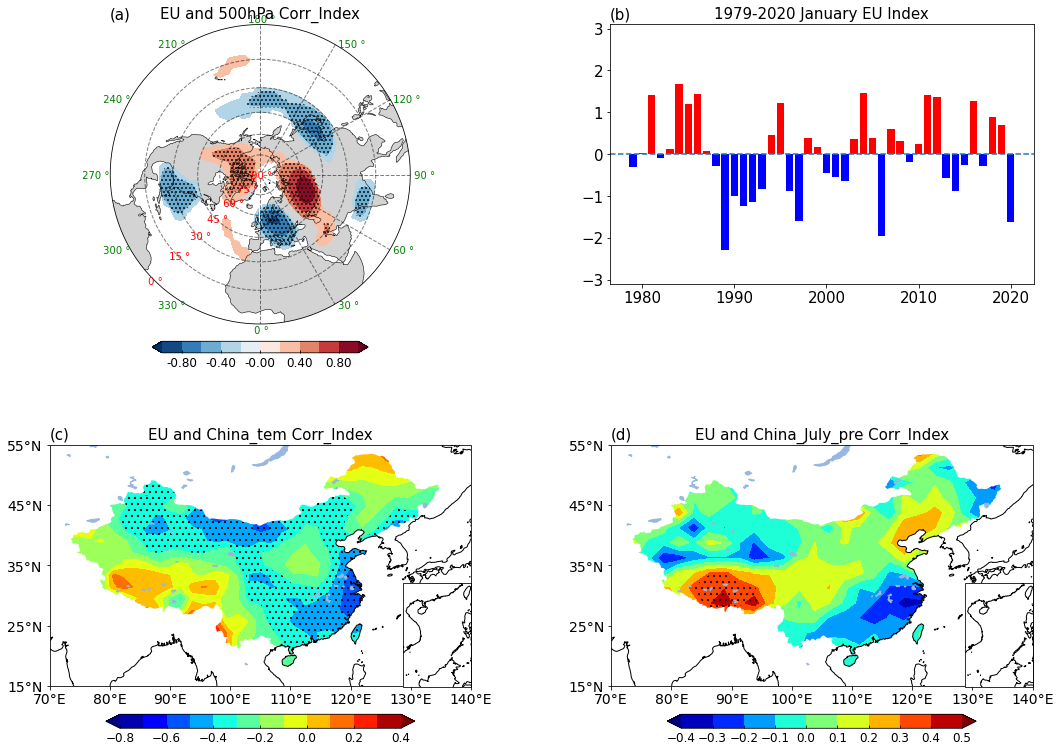

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import maskout31
import cartopy.mpl.ticker as cticker
from cartopy.io.shapereader import Reader

fig = plt.figure(figsize=[12,8])
proj = ccrs.NorthPolarStereo(central_longitude = 0)
ax = fig.add_axes([0.32, 0.78, 0.51, 0.52],projection = proj)
ax.coastlines(linewidths=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.set_extent([-180,180,0,90], ccrs.PlateCarree())

# specifying xlocs/ylocs yields number of meridian/parallel lines
dmeridian = 30  # spacing for lines of meridian
dparallel = 15  # spacing for lines of parallel 
num_merid = 360//dmeridian + 1
num_parra = 90//dparallel + 1
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  xlocs=np.linspace(0, 360, num_merid), 
                  ylocs=np.linspace(0, 90, num_parra), 
                  linestyle="--", linewidth=1, color='k', alpha=0.5)

theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rect bound

# for label alignment
va = 'center' # also bottom, top
ha = 'center' # right, left
degree_symbol=u'\u00B0'

# for locations of (meridional/longitude) labels
lond = np.linspace(0, 360, num_merid)
latd = np.zeros(len(lond))

for (alon, alat) in zip(lond, latd):
    projx1, projy1 = ax.projection.transform_point(alon, alat, ccrs.Geodetic())
    if alon>0 and alon<180:
        ha = 'left'
        va = 'center'
    if alon>180 and alon<360:
        ha = 'right'
        va = 'center'
    if np.abs(alon-180)<0.01:
        ha = 'center'
        va = 'bottom'
    if alon==0.:
        ha = 'center'
        va = 'top'
    if (alon<360.):
        txt =  ' {0} '.format(str(int(alon)))+degree_symbol
        ax.text(projx1, projy1, txt,
                va=va, ha=ha, color='g')

# for locations of (meridional/longitude) labels
# select longitude: 315 for label positioning
lond2 = 315*np.ones(len(lond))
latd2 = np.linspace(0, 90, num_parra)
va, ha = 'center', 'center'
for (alon, alat) in zip(lond2, latd2):
    projx1, projy1 = ax.projection.transform_point(alon, alat, ccrs.Geodetic())
    txt =  ' {0} '.format(str(int(alat)))+degree_symbol
    ax.text(projx1, projy1, 
                txt, va=va, ha=ha, 
                color='r') 
#ax_colorbar=ax.contourf(new_z.lon,new_z.lat,test_r_z,levels =20,zorder=0,extend = 'both',transform=ccrs.PlateCarree(),cmap='RdBu_r')
cf1 = ax.contourf(new_z.lon,new_z.lat,test_r_z, zorder=0, levels =np.arange(-1,1.1,0.2) , extend = 'both',transform=ccrs.PlateCarree(), cmap='RdBu_r')
ax.contourf(new_z.lon,new_z.lat,p_z, [0,0.01,1],zorder=1,hatches=['...', None],colors="none", transform=ccrs.PlateCarree())

ax.set_title('EU and 500hPa Corr_Index',fontsize =15)
ax.set_title('(a)', loc='left', fontsize=15)
#色标
position=fig.add_axes([0.45, 0.73, 0.25, 0.02])
cbar=plt.colorbar(cf1,cax=position,orientation='horizontal',format='%.2f')
cbar.ax.tick_params(labelsize=12, direction='in')

f_ax2 =fig.add_axes([0.98, 0.85, 0.49, 0.45])
bar_map(f_ax2,15,EU_nor,1979,2020)
f_ax2.set_title('1979-2020 January EU Index',fontsize =15)
f_ax2.set_title('(b)', loc='left', fontsize=15)


f_ax3 = fig.add_axes([0.3, 0.02, 0.55, 0.55],projection = ccrs.PlateCarree())
c11=f_ax3.contourf(new_air.lon,new_air.lat,r_air, levels=np.arange(-0.8,0.5,0.1),extend='both',transform=ccrs.PlateCarree(),cmap='jet')
#c12=f_ax4.contour(c11,levels=np.arange(-1,1.1,0.1),transform=ccrs.PlateCarree(),colors='k',linewidths=0.45)
cf2 = f_ax3.contourf(new_air.lon,new_air.lat,p_air,[np.min(p_air),0.05,np.max(p_air)],zorder=1,hatches=['..', None],colors="none", transform=ccrs.PlateCarree())
clip1=maskout31.shp2clip(c11,f_ax3,r"D:\data\china_map\china0.shp")
clip11=maskout31.shp2clip(cf2,f_ax3,r"D:\data\china_map\china0.shp")
c_map(f_ax3,[70, 140, 15, 55],10,1)
f_ax3.set_title('EU and China_tem Corr_Index',fontsize =15) 
f_ax3.set_title('(c)', loc='left', fontsize=15)
cbar=plt.colorbar(c11,shrink=0.65,orientation='horizontal',pad=0.09) 
cbar.ax.tick_params(labelsize=12, direction='in')

f_ax4 = fig.add_axes([0.95, 0.02, 0.55, 0.55],projection = ccrs.PlateCarree())
c11=f_ax4.contourf(new_pre.lon,new_pre.lat,r_pre, levels=np.arange(-0.4,0.6,0.1),extend='both',transform=ccrs.PlateCarree(),cmap='jet')
#c12=f_ax4.contour(c11,levels=np.arange(-1,1.1,0.1),transform=ccrs.PlateCarree(),colors='k',linewidths=0.45)
cf2 = f_ax4.contourf(new_pre.lon,new_pre.lat,p_pre, [0,0.05,1],zorder=1,hatches=['..', None],colors="none", transform=ccrs.PlateCarree())
#cf2 = f_ax4.contourf(new_pre.lon,new_pre.lat,p_pre,[np.min(p_pre),0.05,np.max(p_pre)], zorder=1,hatches=['..', None],colors="none", transform=ccrs.PlateCarree())
clip1=maskout31.shp2clip(c11,f_ax4,r"D:\data\china_map\china0.shp")
clip11=maskout31.shp2clip(cf2,f_ax4,r"D:\data\china_map\china0.shp")
c_map(f_ax4,[70, 140, 15, 55],10,1)
f_ax4.set_title('EU and China_July_pre Corr_Index',fontsize =15) 
f_ax4.set_title('(d)', loc='left', fontsize=15)
cbar=plt.colorbar(c11,shrink=0.65,orientation='horizontal',pad=0.09) 
cbar.ax.tick_params(labelsize=12, direction='in')


#添加南海
ax1 = fig.add_axes([0.58, 0.15, 0.4, 0.18],projection=ccrs.PlateCarree())
c_map(ax1,[105, 122,0,26],10,0)
ax2 = fig.add_axes([1.23, 0.15, 0.4, 0.18],projection=ccrs.PlateCarree())
c_map(ax2,[105, 122,0,26],10,0)
plt.show()


In [26]:
(np.min(r_pre)),np.max(r_pre)

(-0.3482546433816987, 0.46754489901044205)

In [27]:
np.min(r_air),np.max(r_air)

(-0.7204355004033202, 0.32925582571218504)

In [28]:
np.min(test_r_z),np.max(test_r_z)

(nan, nan)

In [29]:
np.arange(-0.8,0.6,0.1)

array([-8.00000000e-01, -7.00000000e-01, -6.00000000e-01, -5.00000000e-01,
       -4.00000000e-01, -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,
       -2.22044605e-16,  1.00000000e-01,  2.00000000e-01,  3.00000000e-01,
        4.00000000e-01,  5.00000000e-01])

In [30]:
new_pre

<xarray.DataArray (time: 42, lat: 22, lon: 28)>
array([[[ 0.17485785,  0.23594308,  0.34645033, ...,  3.76578   ,
          5.7565145 ,  8.087971  ],
        [-0.08702898,  0.41270566,  0.58192015, ...,  4.993587  ,
          6.374222  ,  7.705345  ],
        [ 0.5174751 ,  0.3393097 , -0.27397108, ...,  3.8378315 ,
          3.5928755 ,  3.6670141 ],
        ...,
        [ 0.2868955 ,  0.6934148 ,  0.9321166 , ..., -1.4169583 ,
         -0.44489074,  0.5611768 ],
        [ 1.2016085 ,  1.7392302 ,  1.895743  , ..., -0.60628057,
         -0.10955787,  0.13092637],
        [ 0.58907974,  1.6419852 ,  1.640509  , ...,  0.41889143,
          1.0310853 ,  1.1958053 ]],

       [[ 0.90927553,  1.8948061 ,  1.6098676 , ..., -3.1347136 ,
         -2.9933648 , -1.8520207 ],
        [ 0.89510465,  1.8692245 ,  2.3652058 , ..., -3.5716746 ,
         -3.14848   , -2.3215327 ],
        [ 0.27313733,  1.0526376 ,  1.4743433 , ..., -3.2168374 ,
         -2.0795164 , -0.8646002 ],
...
        [-0.99649227, -1.2081429 , -1.0639665 , ..., -0.25925255,
          0.05586624, -0.63777304],
        [-1.4298728 , -1.3240774 , -0.8412857 , ...,  0.39759254,
         -0.61203504, -0.8492212 ],
        [-0.8640264 , -0.7350855 , -1.1264464 , ...,  2.3385897 ,
          0.29574347, -0.41264844]],

       [[ 0.516881  ,  0.249331  ,  2.595028  , ...,  0.50546646,
          0.35177517, -0.4843731 ],
        [ 0.82646275,  0.45642424,  1.489706  , ..., -0.53184223,
         -1.8786621 , -3.7197604 ],
        [ 4.1079063 ,  1.9690971 ,  0.86217165, ..., -4.6185217 ,
         -3.3882732 , -3.6923232 ],
        ...,
        [ 0.32289708,  0.32242274, -0.09814906, ..., -0.8064375 ,
         -0.12518883,  0.189919  ],
        [-0.13120556,  1.2254565 ,  0.96949506, ..., -0.08734179,
         -0.5071902 , -0.457999  ],
        [-1.2578757 , -0.9926145 , -0.4114238 , ..., -1.2022004 ,
         -0.6437533 , -0.48748827]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-07-01 1980-07-01 ... 2020-07-01
  * lat      (lat) float32 1.25 3.75 6.25 8.75 11.25 ... 46.25 48.75 51.25 53.75
  * lon      (lon) float32 71.25 73.75 76.25 78.75 ... 131.2 133.8 136.2 138.8

In [47]:
nh_air=new_air.loc[:,25:0,105:125]
nh_air

<xarray.DataArray (time: 42, lat: 13, lon: 11)>
array([[[ 1.38418579e+00,  1.30432129e+00,  1.36657715e+00, ...,
          6.67083740e-01,  8.19427490e-01,  7.64862061e-01],
        [ 1.90798950e+00,  1.91210938e+00,  1.72653198e+00, ...,
          6.94427490e-01,  7.80120850e-01,  7.44964600e-01],
        [ 2.07821655e+00,  1.49325562e+00,  1.19860840e+00, ...,
          6.40167236e-01,  6.92443848e-01,  6.65710449e-01],
        ...,
        [ 8.01391602e-02,  2.41088867e-03,  1.65405273e-02, ...,
          7.20214844e-03,  1.62963867e-02,  1.98974609e-02],
        [ 7.02514648e-02, -1.01318359e-01, -3.14941406e-02, ...,
          7.84606934e-02,  1.69616699e-01,  2.46032715e-01],
        [ 1.40777588e-01,  1.25427246e-02,  6.19201660e-02, ...,
          1.53472900e-01,  2.71575928e-01,  3.72467041e-01]],

       [[ 1.26934814e+00,  1.16915894e+00,  8.82659912e-01, ...,
         -5.68756104e-01, -3.80645752e-01, -3.13476562e-01],
        [ 1.82034302e+00,  1.56283569e+00,  1.37518311e+00, ...,
         -3.64562988e-01, -2.01934814e-01, -7.18994141e-02],
        [ 1.80163574e+00,  1.30587769e+00,  8.74206543e-01, ...,
         -1.26098633e-01,  5.81665039e-02,  1.39038086e-01],
...
         -2.81982422e-02,  4.12902832e-02, -6.37817383e-03],
        [ 6.04217529e-01,  5.81909180e-01,  5.72265625e-01, ...,
          4.33654785e-02,  7.80029297e-02,  2.47802734e-02],
        [ 6.45294189e-01,  6.82617188e-01,  6.81640625e-01, ...,
          9.80529785e-02,  1.45263672e-02, -7.40051270e-02]],

       [[ 2.44686890e+00,  2.98248291e+00,  3.36532593e+00, ...,
          6.88781738e-01,  5.95489502e-01,  5.91857910e-01],
        [ 2.60504150e+00,  2.80035400e+00,  3.01257324e+00, ...,
          4.17602539e-01,  3.66180420e-01,  3.81805420e-01],
        [ 2.11755371e+00,  2.08111572e+00,  2.04772949e+00, ...,
          2.03277588e-01,  2.26165771e-01,  3.02978516e-01],
        ...,
        [-2.00195312e-02, -9.27734375e-02,  1.07299805e-01, ...,
         -8.23364258e-02, -5.38635254e-02,  5.87158203e-02],
        [ 4.55322266e-02, -7.90405273e-02,  1.53503418e-02, ...,
         -5.92651367e-02, -9.90600586e-02, -4.50134277e-02],
        [ 4.58984375e-02, -7.91320801e-02, -1.66015625e-02, ...,
          2.36145020e-01,  1.46087646e-01,  6.23168945e-02]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2020-01-01
  * lat      (lat) float32 23.81 21.9 20.0 18.09 ... 6.667 4.762 2.857 0.9524
  * lon      (lon) float32 105.0 106.9 108.8 110.6 ... 118.1 120.0 121.9 123.8

In [55]:
nh_pre=new_pre.loc[:,0:25,105:125]
nh_pre

<xarray.DataArray (time: 42, lat: 10, lon: 8)>
array([[[ 0.93780756,  0.40812874, -1.6817002 , ...,  0.34399223,
         -0.7681606 , -1.5628715 ],
        [ 2.1642318 ,  1.7167253 ,  1.0894356 , ...,  2.0007029 ,
          0.85392404,  1.1971846 ],
        [ 3.9226208 ,  3.9018083 ,  2.7988396 , ...,  2.8184853 ,
          1.3494139 ,  0.82241106],
        ...,
        [-2.573626  , -2.798678  , -2.6107404 , ..., -1.83373   ,
         -0.09864998, -2.1352584 ],
        [-2.2141767 , -3.4098244 , -1.7498918 , ..., -2.6209111 ,
         -1.5847826 , -1.6226044 ],
        [ 0.05714607, -2.8668737 , -2.6494126 , ..., -2.7604887 ,
         -4.506543  , -1.0401033 ]],

       [[-1.8595645 , -1.6541309 , -1.1177235 , ..., -0.69678855,
         -2.418487  , -2.590373  ],
        [-1.2491052 , -1.4112134 , -1.4929824 , ...,  0.89408684,
         -1.7726896 , -2.0624928 ],
        [-0.27648306, -1.1901999 , -1.0134382 , ..., -0.06406641,
         -0.5541835 , -1.3947086 ],
...
        [-1.0064545 , -1.0675802 ,  0.40175438, ...,  0.03684902,
         -0.58300877, -3.5199418 ],
        [-2.139862  , -2.4146862 , -0.59457207, ..., -0.07380104,
          0.53634644, -3.2869692 ],
        [ 0.9485116 ,  1.6002035 ,  1.2784009 , ...,  1.1792431 ,
         -1.9487514 , -0.43289375]],

       [[ 3.901152  ,  6.8260794 ,  6.5843883 , ...,  4.30271   ,
          4.5454764 ,  1.7079663 ],
        [ 2.0137057 ,  3.1426835 ,  5.333319  , ...,  1.1464944 ,
          0.74811864,  0.20335388],
        [-1.1939921 ,  2.0273705 ,  1.4196506 , ..., -0.5986457 ,
          0.13791037, -0.491477  ],
        ...,
        [-6.903203  , -4.5065317 , -3.3251133 , ..., -3.542973  ,
         -3.0992775 , -4.0594883 ],
        [-6.533547  , -5.3234053 , -4.1624947 , ..., -3.4547782 ,
         -4.498168  , -4.2265916 ],
        [-0.58569336,  0.49780273, -1.8536272 , ..., -3.1716056 ,
         -5.6957397 , -2.0554712 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-07-01 1980-07-01 ... 2020-07-01
  * lat      (lat) float32 1.25 3.75 6.25 8.75 11.25 ... 16.25 18.75 21.25 23.75
  * lon      (lon) float32 106.2 108.8 111.2 113.8 116.2 118.8 121.2 123.8

# 完整代码

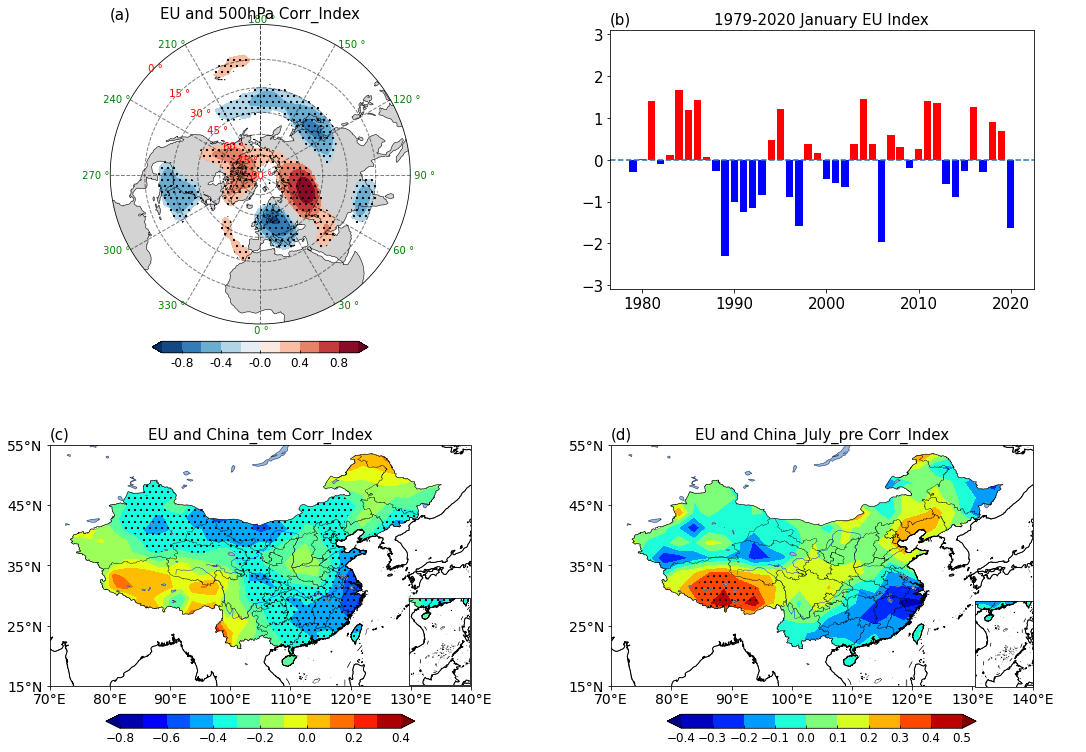

In [3]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.util import add_cyclic_point
from scipy.stats import pearsonr
from scipy.signal import detrend
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import xarray as xr
import maskout31
import matplotlib.pyplot as plt
import matplotlib.path as mpath

#读取nc，除去多余变量
prec = xr.open_dataset(
    r"D:\data\short_term_climate_class\sx04\precip.mon.mean.nc",
    drop_variables=["time_bnds", 'lat_bnds', 'lon_bnds'])
tem = xr.open_dataset(
    r"D:\data\short_term_climate_class\sx03\air.2m.mon.mean.nc",
    drop_variables=["time_bnds"])
z = xr.open_dataset(
    r"D:\data\short_term_climate_class\sx01\hgt.mon.mean.nc",
    drop_variables=["time_bnds"])

#提取数据
#500hPa
z_500 = z.hgt.loc[z.time.dt.month.isin([1])].loc[
         '1979-01-01':'2020-02-01',500, 90:0, 0:360]
#同期中国气温
air = tem.air.loc[tem.time.dt.month.isin([1])].loc[
              '1979-01-01':'2020-02-01',2.0, 55:0, 70:140]
#同期中国降水
pre = prec.precip.loc[prec.time.dt.month.isin([7])].loc[
           '1979-01-01':'2020-12-01', 0:55, 70:140]


#去趋势函数det()
def det(data, lon, lat, time):
    det_data = detrend(data, axis=0, type='linear')

    new_data = xr.DataArray(det_data,
                            dims=["time", "lat", "lon"],
                            coords={
                                'time': time,
                                'lat': lat,
                                'lon': lon
                            })
    return new_data


#求相关系数函数cor()
def cor(x, y, data_1, data_2):
    r = np.zeros(shape=(y, x))
    p = np.zeros(shape=(y, x))
    test_r = np.zeros(shape=(y, x))
    for i in range(y):
        for j in range(x):
            r[i, j], p[i, j] = pearsonr(data_1, data_2[:, i, j])
            if abs(p[i, j]) >= 0.05:
                test_r[i, j] = np.NaN
            else:
                test_r[i, j] = r[i, j]

    return r, p, test_r


#计算
new_z = det(z_500, z_500.lon, z_500.lat, z_500.time)
new_air = det(air, air.lon, air.lat, air.time)
new_pre = det(pre, pre.lon, pre.lat, pre.time)
#EU指数
EU = -new_z.loc[:, 55, 20] / 4. + new_z.loc[:, 55,75] / 2. - new_z.loc[:, 40,145] / 4.
#标准化
EU_nor = (EU - EU.mean(axis=0)) / (EU.std(axis=0))
EU_nor
#计算相关系数
r_z, p_z, test_r_z = cor(144, 37, EU_nor, new_z)
r_air, p_air, test_r_air = cor(37, 29, EU_nor, new_air)
r_pre, p_pre, test_r_pre = cor(28, 22, EU_nor, new_pre)
#南海
nh_air = new_air.loc[:, 25:0, 105:125]
nh_pre = new_pre.loc[:, 0:25, 105:125]
nh_r_air, nh_p_air, nh_test_r_air = cor(11, 13, EU_nor, nh_air)
nh_r_pre, nh_p_pre, nh_test_r_pre = cor(8, 10, EU_nor, nh_pre)


#PC序列底图
def bar_map(fig_ax, size, data_pc, start_year, end_year):
    c_color = []
    for i in range(start_year, end_year + 1):
        if data_pc[i - start_year] > 0:
            c_color.append('red')
        elif data_pc[i - start_year] <= 0:
            c_color.append('blue')
    fig_ax.set_ylim(-3.1, 3.1)
    fig_ax.axhline(0, linestyle="--")
    plt.xticks(size=size)
    plt.yticks(size=size)
    fig_ax.bar(range(start_year, end_year + 1), data_pc, color=c_color)


#填色底图
def c_map(ax, img_extent, spec, a, size=None):
    proj = ccrs.PlateCarree()
    ax.set_extent(img_extent, crs=proj)
    if a == 1:
        ax.set_xticks(np.arange(img_extent[0], img_extent[1] + spec, spec),
                      crs=proj)
        ax.set_yticks(np.arange(img_extent[2], img_extent[3] + spec, spec),
                      crs=proj)
        lon_formatter = cticker.LongitudeFormatter()
        lat_formatter = cticker.LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)
        plt.xticks(fontsize=size)  # 设置标签大小
        plt.yticks(fontsize=size)
    else:

        pass

    #ax.add_feature(cfeature.OCEAN.with_scale('50m'))#海洋
    #ax.add_feature(cfeature.LAND.with_scale('50m'))#陆地
    ax.add_feature(cfeature.LAKES.with_scale('50m'))  #湖泊
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

    ax.add_geometries(Reader(r'D:\data\china_map\river1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='b',
                      linewidth=0.4)  #长江黄河
    ax.add_geometries(Reader(r'D:\data\china_map\china1.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.5)  #详细国界中国国界
    ax.add_geometries(Reader(r'D:\data\china_map\china2.shp').geometries(),
                      ccrs.PlateCarree(),
                      facecolor='none',
                      edgecolor='k',
                      linewidth=0.2)  #省界
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_10m_land.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.4)  #海岸线
    ax.add_geometries(
        Reader(r'D:\data\china_map\ne_50m_lakes.shp').geometries(),
        ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='k',
        linewidth=0.3)  #湖泊


#北极点极地投影底图
def NPS_map(ax):
    ax.coastlines(linewidths=0.5)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_extent([-180, 180, 0, 90], ccrs.PlateCarree())

    # specifying xlocs/ylocs yields number of meridian/parallel lines
    dmeridian = 30  # spacing for lines of meridian
    dparallel = 15  # spacing for lines of parallel
    num_merid = 360 // dmeridian + 1
    num_parra = 90 // dparallel + 1
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      xlocs=np.linspace(-180, 180, num_merid),
                      ylocs=np.linspace(0, 90, num_parra),
                      linestyle="--",
                      linewidth=1,
                      color='k',
                      alpha=0.5)

    theta = np.linspace(0, 2 * np.pi, 120)
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    center, radius = [0.5, 0.5], 0.5
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle,
                    transform=ax.transAxes)  #without this; get rect bound

    # for label alignment
    va = 'center'  # also bottom, top
    ha = 'center'  # right, left
    degree_symbol = u'\u00B0'

    # for locations of (meridional/longitude) labels
    lond = np.linspace(0, 360, num_merid)
    latd = np.zeros(len(lond))

    for (alon, alat) in zip(lond, latd):
        projx1, projy1 = ax.projection.transform_point(alon, alat,
                                                       ccrs.Geodetic())
        if alon > 0 and alon < 180:
            ha = 'left'
            va = 'center'
        if alon > 180 and alon < 360:
            ha = 'right'
            va = 'center'
        if np.abs(alon - 180) < 0.01:
            ha = 'center'
            va = 'bottom'
        if alon == 0.:
            ha = 'center'
            va = 'top'
        if (alon < 360.):
            txt = ' {0} '.format(str(int(alon))) + degree_symbol
            ax.text(projx1, projy1, txt, va=va, ha=ha, color='g')

    # for locations of (meridional/longitude) labels
    # select longitude: 225 for label positioning
    lond2 = 225 * np.ones(len(lond))
    latd2 = np.linspace(0, 90, num_parra)
    va, ha = 'center', 'center'
    for (alon, alat) in zip(lond2, latd2):
        projx1, projy1 = ax.projection.transform_point(alon, alat,
                                                       ccrs.Geodetic())
        txt = ' {0} '.format(str(int(alat))) + degree_symbol
        ax.text(projx1, projy1, txt, va=va, ha=ha, color='r')


fig = plt.figure(figsize=[12, 8])
#图(a)
proj = ccrs.NorthPolarStereo(central_longitude=0)
f_ax1 = fig.add_axes([0.32, 0.78, 0.51, 0.52], projection=proj)
c_data, cycle_lon = add_cyclic_point(test_r_z, coord=new_z.lon)
LON, LAT = np.meshgrid(cycle_lon, new_z.lat)
NPS_map(f_ax1)
cf1 = f_ax1.contourf(LON,
                     LAT,
                     c_data,
                     levels=np.arange(-1, 1.1, 0.2),
                     extend='both',
                     transform=ccrs.PlateCarree(),
                     cmap='RdBu_r')
#打点: 显著性水平为 95%
f_ax1.contourf(new_z.lon,
               new_z.lat,
               p_z, [0, 0.05, 1],
               zorder=1,
               hatches=['..', None],
               colors="none",
               transform=ccrs.PlateCarree())
f_ax1.set_title('EU and 500hPa Corr_Index', fontsize=15)
f_ax1.set_title('(a)', loc='left', fontsize=15)
position = fig.add_axes([0.45, 0.73, 0.25, 0.02])
cbar = plt.colorbar(cf1, cax=position, orientation='horizontal', format='%.1f')
cbar.ax.tick_params(labelsize=12, direction='in')

#图(b)
f_ax2 = fig.add_axes([0.98, 0.84, 0.49, 0.45])
bar_map(f_ax2, 15, EU_nor, 1979, 2020)
f_ax2.set_title('1979-2020 January EU Index', fontsize=15)
f_ax2.set_title('(b)', loc='left', fontsize=15)

#图(c)
f_ax3 = fig.add_axes([0.3, 0.02, 0.55, 0.55], projection=ccrs.PlateCarree())
cf3 = f_ax3.contourf(new_air.lon,
                     new_air.lat,
                     r_air,
                     levels=np.arange(-0.8, 0.5, 0.1),
                     extend='both',
                     transform=ccrs.PlateCarree(),
                     cmap='jet')
cf31 = f_ax3.contourf(new_air.lon,
                      new_air.lat,
                      p_air,
                      [np.min(p_air), 0.05, np.max(p_air)],
                      hatches=['..', None],
                      colors="none",
                      transform=ccrs.PlateCarree())
clip3 = maskout31.shp2clip(cf3, f_ax3, r"D:\data\china_map\china0.shp")
clip31 = maskout31.shp2clip(cf31, f_ax3, r"D:\data\china_map\china0.shp")
c_map(f_ax3, [70, 140, 15, 55], 10, 1, 14)
f_ax3.set_title('EU and China_tem Corr_Index', fontsize=15)
f_ax3.set_title('(c)', loc='left', fontsize=15)
cbar = plt.colorbar(cf3, shrink=0.65, orientation='horizontal', pad=0.09)
cbar.ax.tick_params(labelsize=12, direction='in')

#图(d)
f_ax4 = fig.add_axes([0.95, 0.02, 0.55, 0.55], projection=ccrs.PlateCarree())
cf4 = f_ax4.contourf(new_pre.lon,
                     new_pre.lat,
                     r_pre,
                     levels=np.arange(-0.4, 0.6, 0.1),
                     extend='both',
                     transform=ccrs.PlateCarree(),
                     cmap='jet')
cf41 = f_ax4.contourf(new_pre.lon,
                      new_pre.lat,
                      p_pre, [0, 0.05, 1],
                      zorder=1,
                      hatches=['..', None],
                      colors="none",
                      transform=ccrs.PlateCarree())
clip4 = maskout31.shp2clip(cf4, f_ax4, r"D:\data\china_map\china0.shp")
clip41 = maskout31.shp2clip(cf41, f_ax4, r"D:\data\china_map\china0.shp")
c_map(f_ax4, [70, 140, 15, 55], 10, 1, 14)
f_ax4.set_title('EU and China_July_pre Corr_Index', fontsize=15)
f_ax4.set_title('(d)', loc='left', fontsize=15)
cbar = plt.colorbar(cf4, shrink=0.65, orientation='horizontal', pad=0.09)
cbar.ax.tick_params(labelsize=12, direction='in')

#南海
ax1 = fig.add_axes([0.5825, 0.1535, 0.4, 0.15], projection=ccrs.PlateCarree())
c_map(ax1, [105, 122, 0, 24], 10, 0)
cf5 = ax1.contourf(nh_air.lon,
                   nh_air.lat,
                   nh_r_air,
                   levels=np.arange(-0.8, 0.5, 0.1),
                   extend='both',
                   transform=ccrs.PlateCarree(),
                   cmap='jet')
cf51 = ax1.contourf(nh_air.lon,
                    nh_air.lat,
                    nh_p_air, [0.0, 0.05, 1],
                    hatches=['..', None],
                    colors="none",
                    transform=ccrs.PlateCarree())
clip5 = maskout31.shp2clip(cf5, ax1, r"D:\data\china_map\china0.shp")
clip51 = maskout31.shp2clip(cf51, ax1, r"D:\data\china_map\china0.shp")

ax2 = fig.add_axes([1.236, 0.15, 0.4, 0.15], projection=ccrs.PlateCarree())
c_map(ax2, [106, 122, 0, 24], 10, 0)
cf6 = ax2.contourf(nh_pre.lon,
                   nh_pre.lat,
                   nh_r_pre,
                   levels=np.arange(-0.4, 0.6, 0.1),
                   extend='both',
                   transform=ccrs.PlateCarree(),
                   cmap='jet')
cf61 = ax1.contourf(nh_pre.lon,
                    nh_pre.lat,
                    nh_p_pre, [0.0, 0.05, 1],
                    hatches=['..', None],
                    colors="none",
                    transform=ccrs.PlateCarree())
clip5 = maskout31.shp2clip(cf6, ax2, r"D:\data\china_map\china0.shp")
clip51 = maskout31.shp2clip(cf61, ax2, r"D:\data\china_map\china0.shp")
plt.savefig(r'D:\data\short_term_climate_class\sx04\EU.jpg',
            dpi=300,
            bbox_inches='tight')
plt.show()

# 最后修改时间 2020-4-30-15:55
# 若有错误请联系 845728580@qq.com